# Week 3
#### Reading the cleaned data from the csv
And assuming the data is cleaned already, we won't check anything

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../week2/cleaned_playstore.csv", index_col=0)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,1.900000e+07,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,1.400000e+07,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000e+06,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,2.500000e+07,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000e+06,100000,Free,0.0,Everyone


### Task 1 Version 1
I will replot the previous results with different libraries. <br>
I already know how to create plots in matplotlib and Seaborn so I am going to use Altair 

In [4]:
!pip install altair

     -------------------------------------- 813.6/813.6 kB 1.7 MB/s eta 0:00:00


In [5]:
import altair as alt

Make the data useful for viz

In [6]:
unique_values = data['Category'].unique()
unique_values.sort()

categories = pd.DataFrame({'Category': unique_values})

installs = data.groupby('Category')['Installs'].sum().reset_index()
categories['Total_Installs'] = installs['Installs']

prices = data.groupby('Category')['Price'].sum().reset_index()
categories['Total_Price'] = prices['Price']

data['Revenue'] = data['Price'] * data['Installs']
revenues = data.groupby('Category')['Revenue'].sum().reset_index()
categories['Total_Revenue'] = revenues['Revenue']

#### Task 2 for Week 2

In [7]:
# We declare the source, chart type in the first line then we declare the axes and the way we want to sort inside using alt.X
chart = alt.Chart(categories).mark_bar().encode(
    x= alt.X('Category:N', sort= '-y'),
    y = 'Total_Installs:Q'
)

# To modify X axis we use configure_axisX 
chart = chart.configure_axisX(
    labelAngle = 45
)

# To add header text we use properties
chart = chart.properties(
    title={
        "text": "Total Installs by Category"
    }
)

# To increase font size of the title text we use configure_title
chart = chart.configure_title(
    fontSize = 20
)

chart

alt.Chart(...)

#### Task 3 for Week 2 but horizontal

In [8]:
# We declare the source, chart type in the first line then we declare the axes and the way we want to sort inside using alt.X
chart = alt.Chart(categories).mark_bar().encode(    
    x = 'Total_Price:Q',
    y = alt.Y('Category:N', sort= '-x')   
)

# To modify X axis we use configure_axisX 
chart = chart.configure_axisX(
    labelAngle = 45
)

# To add header text we use properties
chart = chart.properties(
    title={
        "text": "Total Installs by Category"
    }
)

# To increase font size of the title text we use configure_title
chart = chart.configure_title(
    fontSize = 20
)

chart

alt.Chart(...)

#### Task 4 for Week 2 but it's a pie chart for top 5

In [9]:
df_sorted = categories.sort_values('Total_Revenue', ascending=False)[:5]

base = alt.Chart(df_sorted).encode(
    theta = alt.Theta('Total_Revenue:Q', stack=True),
    color = alt.Color('Category:N', legend = None),
    tooltip = ['Category', 'Total_Revenue']
).properties(
    width = 500,
    height = 500,
    title = {
        "text": 'Top 5 Total Revenue by Category'
    } 
)

pie = base.mark_arc(outerRadius = 200)
text = base.mark_text(radius = 230, size = 12).encode(text= 'Category:N')
pie+text

alt.LayerChart(...)

### Task 1 Version 2
I am not totally satisfied with the results above, so I am replotting them in seaborn also

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

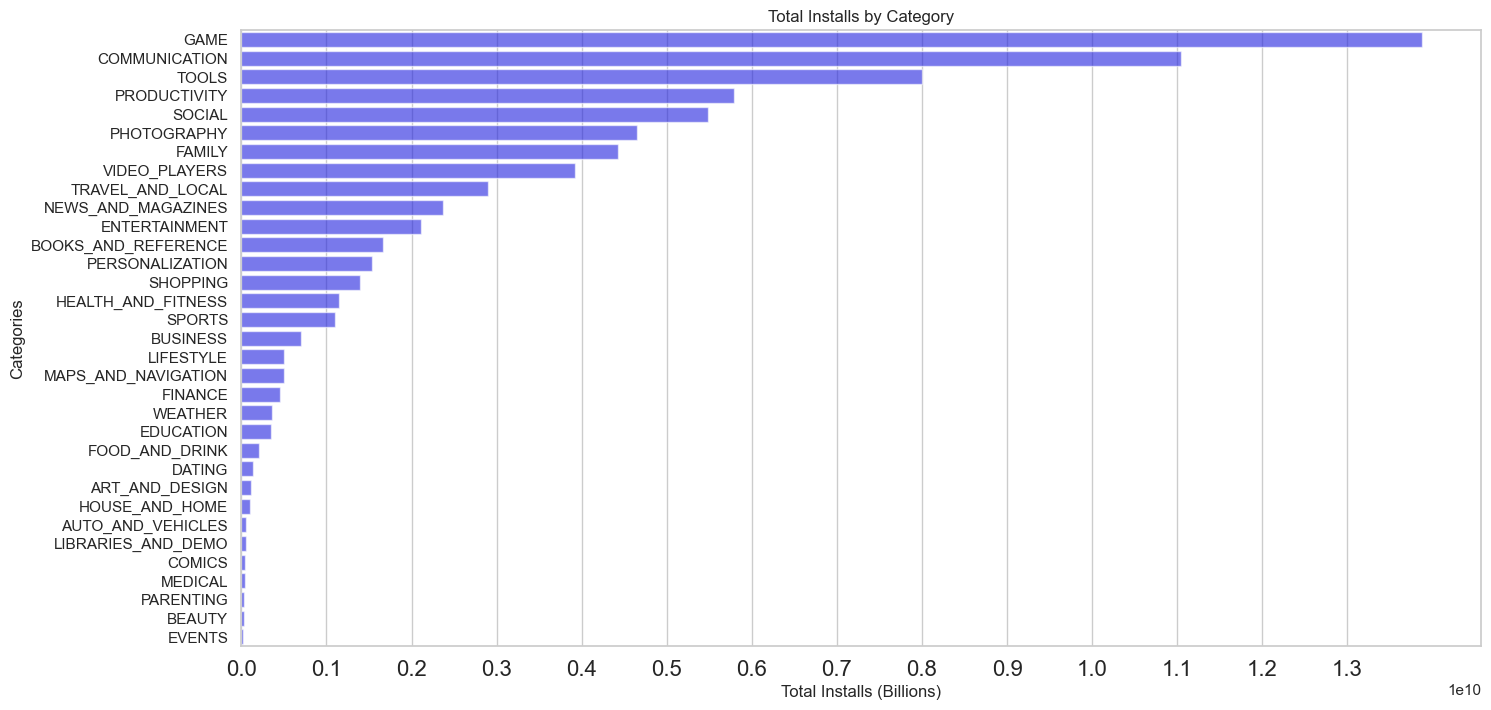

In [11]:
sns.set(style = 'whitegrid')
fig, ax = plt.subplots(figsize = (16,8))
sns.barplot(data = categories.sort_values('Total_Installs', ascending=False),
            x = 'Total_Installs', y = 'Category', color = 'blue', alpha = 0.6 ,ax= ax)
ax.set_title('Total Installs by Category')
ax.set_xlabel('Total Installs (Billions)')  #Needs fix
ax.set_ylabel('Categories')
plt.xticks(np.arange(0, 14000000000, step = 1000000000),size = 16)
_ = ax

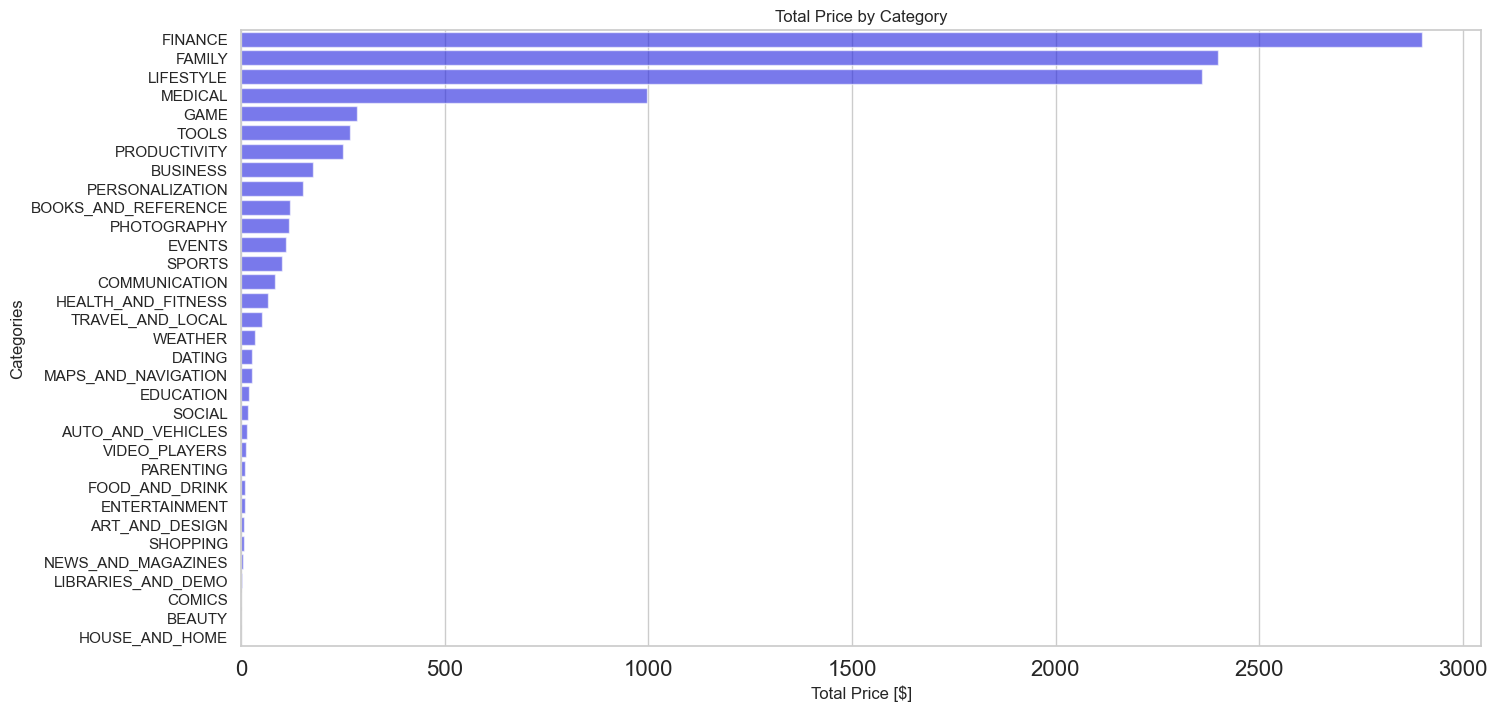

In [12]:
fig, ax = plt.subplots(figsize = (16,8))
sns.barplot(data = categories.sort_values('Total_Price', ascending=False),
            x = 'Total_Price', y = 'Category', color = 'blue', alpha = 0.6 ,ax= ax)
ax.set_title('Total Price by Category')
ax.set_xlabel('Total Price [$]')
ax.set_ylabel('Categories')
plt.xticks(size = 16)
_ = ax

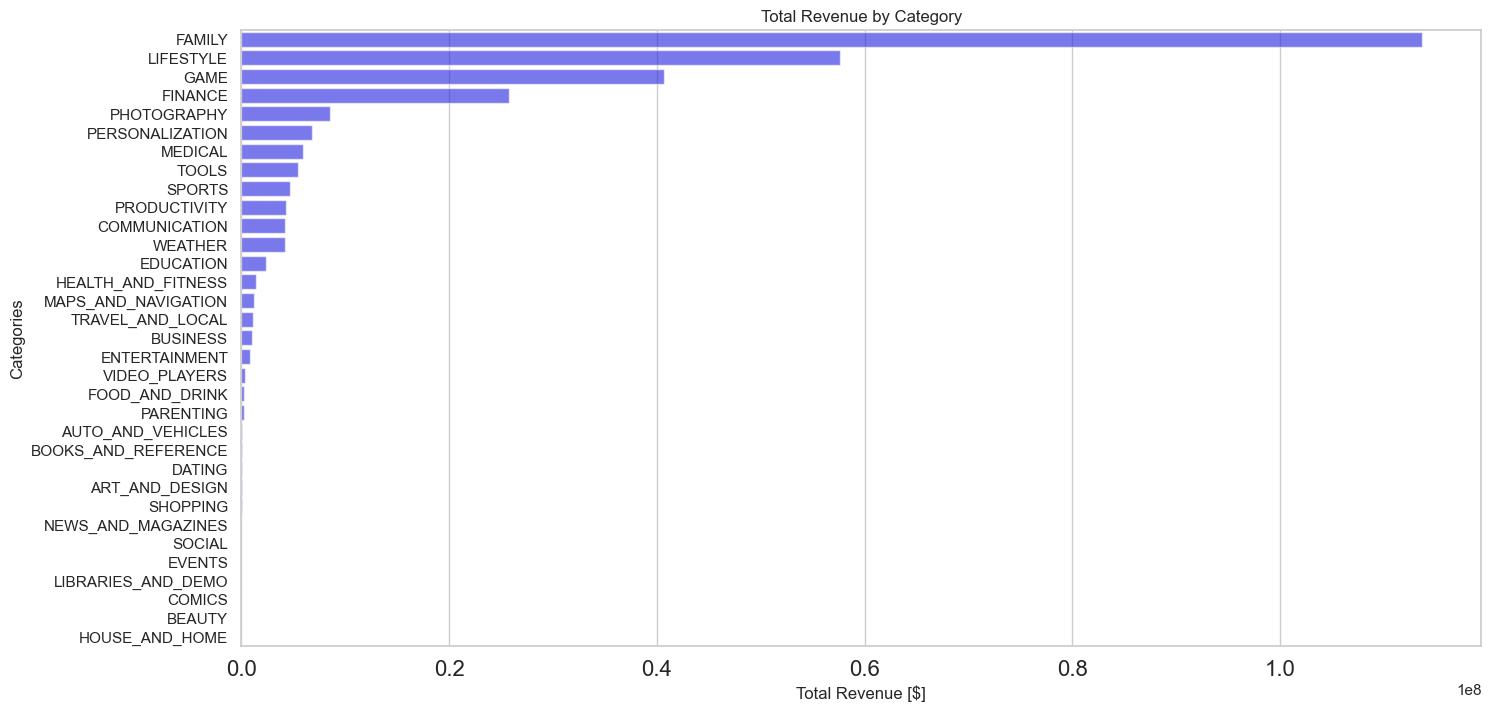

In [13]:
fig, ax = plt.subplots(figsize = (16,8))
sns.barplot(data = categories.sort_values('Total_Revenue', ascending=False),
            x = 'Total_Revenue', y = 'Category', color = 'blue', alpha = 0.6 ,ax= ax)
ax.set_title('Total Revenue by Category')
ax.set_xlabel('Total Revenue [$]')
ax.set_ylabel('Categories')
plt.xticks(size = 16)       #Needs fix
_ = ax

#### Task 2
Find top 5 apps that is smallest in size but highest in installs.
<br>
Note: The idea is to show that small apps don't necessarily have small number of installs. This has to be done on whole dataset (no need to split into any category). 
<br>
PS: I tried to plot the data using plotnine (ggplot2) and it was not really appealing so I swapped to seaborn

In [14]:
df = data.sort_values(['Size', 'Installs'], ascending=[True, False]).head(5)    #picking the top 5 after sorting the data
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Revenue
1244,Essential Resources,LIBRARIES_AND_DEMO,4.6,237,8500.0,50000,Free,0.00,Everyone,0.000000
1265,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11000.0,1000000,Free,0.00,Everyone,0.000000
4039,My baby firework (Remove ad),FAMILY,4.1,30,14000.0,1000,Paid,0.99,Everyone,990.000010
8912,ExDialer PRO Key,COMMUNICATION,4.5,5474,17000.0,100000,Paid,3.99,Everyone,399000.001000
4034,Ad Remove Plugin for App2SD,PRODUCTIVITY,4.1,66,17000.0,1000,Paid,1.29,Everyone,1289.999962


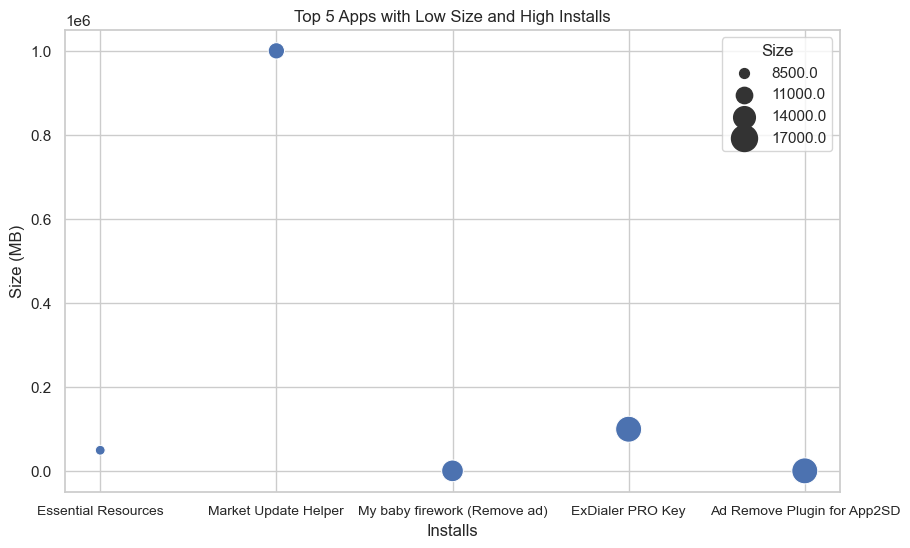

In [15]:
fig, ax = plt.subplots(figsize = (10,6))
sns.scatterplot(data = df, x = 'App', y= 'Installs', size='Size', sizes= (50,350), ax = ax)
ax.set_title('Top 5 Apps with Low Size and High Installs')
ax.set_xlabel('Installs')
ax.set_ylabel('Size (MB)')
plt.xticks(size = 10)
_ = ax

#### Task 3
For each category, find top 5 installed free and paid apps. <br>
Note: if there is a group of apps that has no paid or free apps in it, it's not a problem, output is just 0

In [16]:
df = data.sort_values('Installs', ascending=False).groupby(['Category', 'Type']).head(5)

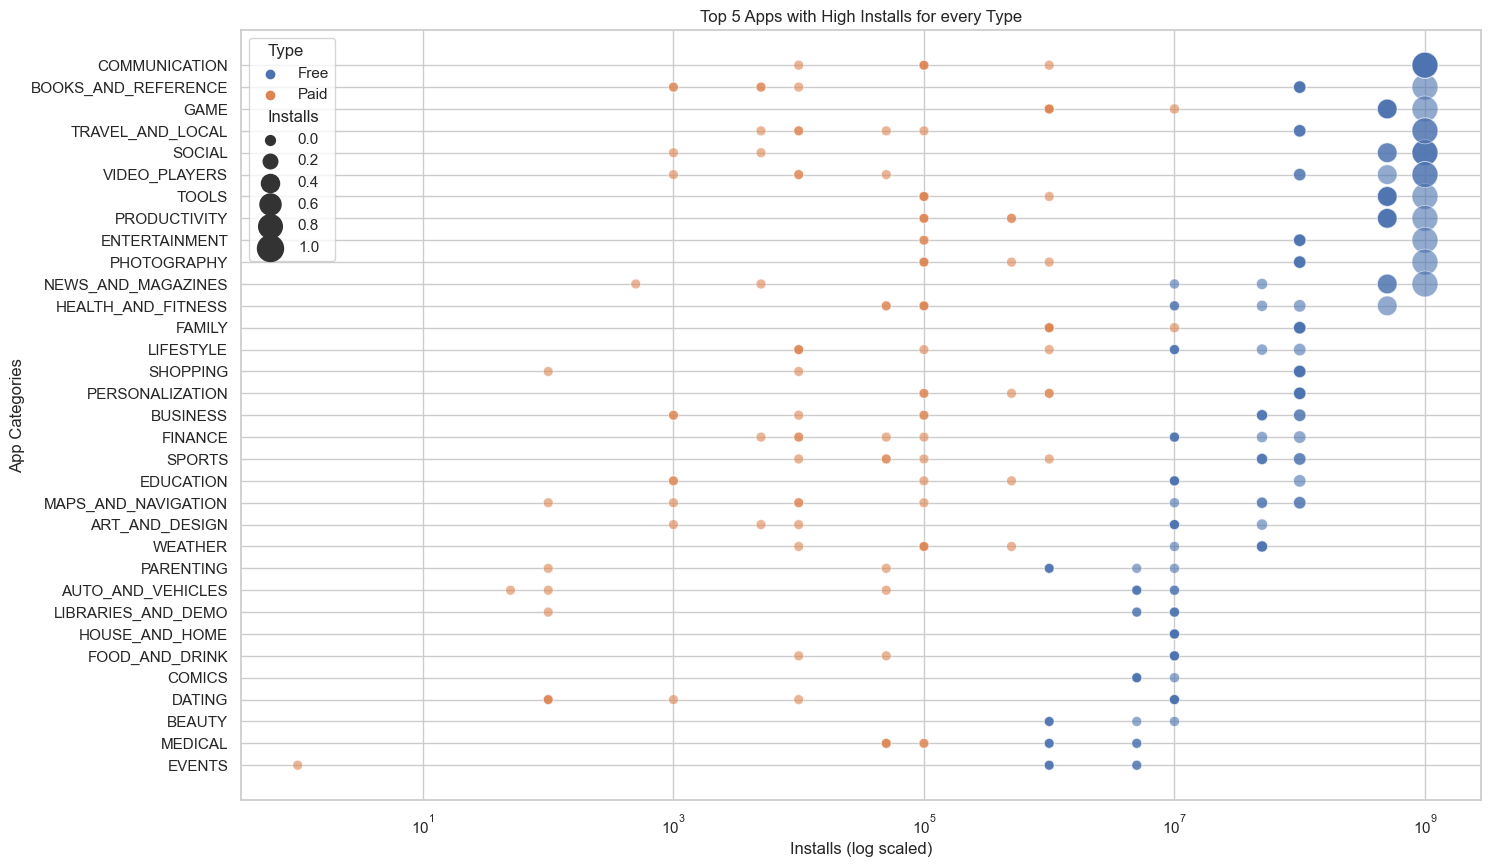

In [17]:
fig, ax = plt.subplots(figsize = (16,10))
sns.scatterplot(data = df, x = 'Installs', y= 'Category', hue='Type', size = 'Installs', sizes= (50,350), ax = ax, alpha = 0.6)
ax.set_title('Top 5 Apps with High Installs for every Type')
ax.set_ylabel('App Categories')
ax.set_xlabel('Installs (log scaled)')
plt.xscale('log')
_ = ax